In [1]:
!pip install keras


In [0]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import io

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
import keras
from keras.models import  Sequential
from keras.models import Model
from keras.layers import  Dense
from keras.optimizers import Adam

from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding


Using TensorFlow backend.


In [0]:
import pydot
import graphviz
# from Ipython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model





In [0]:
BHNames=['crim','zn','indus','chas','nox','rm', 'age', 'dis', 'rad','tax','ptratio', 'black', 'lstat','medv']
url="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
df= pd.read_csv(url,delim_whitespace=True,names=BHNames)

In [0]:
summary=df.describe()
summary=summary.transpose()
print(summary)

         count        mean         std  ...        50%         75%       max
crim     506.0    3.613524    8.601545  ...    0.25651    3.677082   88.9762
zn       506.0   11.363636   23.322453  ...    0.00000   12.500000  100.0000
indus    506.0   11.136779    6.860353  ...    9.69000   18.100000   27.7400
chas     506.0    0.069170    0.253994  ...    0.00000    0.000000    1.0000
nox      506.0    0.554695    0.115878  ...    0.53800    0.624000    0.8710
rm       506.0    6.284634    0.702617  ...    6.20850    6.623500    8.7800
age      506.0   68.574901   28.148861  ...   77.50000   94.075000  100.0000
dis      506.0    3.795043    2.105710  ...    3.20745    5.188425   12.1265
rad      506.0    9.549407    8.707259  ...    5.00000   24.000000   24.0000
tax      506.0  408.237154  168.537116  ...  330.00000  666.000000  711.0000
ptratio  506.0   18.455534    2.164946  ...   19.05000   20.200000   22.0000
black    506.0  356.674032   91.294864  ...  391.44000  396.225000  396.9000

In [0]:
#To Bring Data in between 0 and 1

scaller= MinMaxScaler()
scaller.fit(df)
print(scaller.fit(df))
dataScaled= scaller.fit_transform(df)
dataScaled= pd.DataFrame(dataScaled,columns= BHNames)




MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
summary=dataScaled.describe()
summary=summary.transpose()
print(summary)

         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    506.0  0.301409 

In [0]:
dataScaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


In [0]:
#Check Corelation 
corData= dataScaled.corr(method='pearson')
with pd.option_context('display.max_rows',None,'display.max_columns',corData.shape[1]):
  print(corData)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

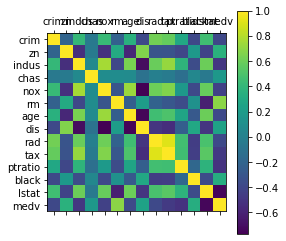

In [0]:
plt.matshow(corData)
plt.xticks(range(len(corData.columns)),corData.columns)
plt.yticks(range(len(corData.columns)),corData.columns)

plt.colorbar()
plt.show()

In [0]:
X= dataScaled.drop('medv',axis=1)
Y= dataScaled['medv']


In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


In [0]:
#DL Start


In [0]:
model= Sequential()

In [0]:
model.add(Dense(20,input_dim=13,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))


In [0]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train, verbose=1, epochs=500)





Epoch 1/500





404/404 [==============================] - 0s 585us/step - loss: 0.0981 - acc: 0.0074
Epoch 2/500
404/404 [==============================] - 0s 64us/step - loss: 0.0608 - acc: 0.0050
Epoch 3/500
404/404 [==============================] - 0s 62us/step - loss: 0.0399 - acc: 0.0074
Epoch 4/500
404/404 [==============================] - 0s 50us/step - loss: 0.0296 - acc: 0.0149
Epoch 5/500
404/404 [==============================] - 0s 57us/step - loss: 0.0255 - acc: 0.0322
Epoch 6/500
404/404 [==============================] - 0s 58us/step - loss: 0.0230 - acc: 0.0322
Epoch 7/500
404/404 [==============================] - 0s 47us/step - loss: 0.0208 - acc: 0.0322
Epoch 8/500
404/404 [==============================] - 0s 46us/step - loss: 0.0186 - acc: 0.0322
Epoch 9/500
404/404 [==============================] - 0s 51us/step - loss: 0.0172 - acc: 0.0322
Epoch 10/500
404/404 [==============================] - 0s 53us/step - loss: 0.0158 - acc: 0.0347
Epoch 11/500
404/404

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [0]:
y_predKM = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose=0)
print(score[0])

0.004764245546824646


In [0]:
# ye mean square error ha or jitna bara utna bura 
# 0.004764245546824646

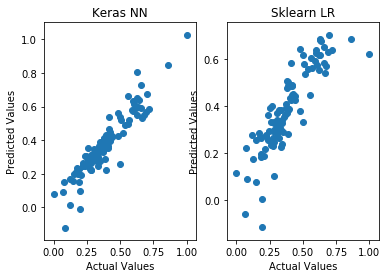

In [0]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

y_predLM= lm.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(y_test,y_predKM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Keras NN')



plt.figure(1)
plt.subplot(122)
plt.scatter(y_test,y_predLM)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Sklearn LR')
plt.show()



In [0]:

from sklearn.metrics import mean_squared_error

mse =mean_squared_error(y_test,y_predLM)
print(mse)

0.008324075102196874
